# Pandas

In [2]:
import pandas as pd

In [3]:
df  =  pd.read_csv(  'https://www.fdsp.net/data/covid-merged.csv'  )

In [4]:
df.head()

,state,cases,population,gdp,urban
0,Alabama,7068,4903185,230750.1,59.04
1,Alaska,353,731545,54674.7,66.02
2,Arizona,7648,7278717,379018.8,89.81
3,Arkansas,3281,3017804,132596.4,56.16
4,California,50470,39512223,3205000.1,94.95


In [5]:
df.set_index('state', inplace=True)
df.head()

,cases,population,gdp,urban
state,,,,
Alabama,7068,4903185,230750.1,59.04
Alaska,353,731545,54674.7,66.02
Arizona,7648,7278717,379018.8,89.81
Arkansas,3281,3017804,132596.4,56.16
California,50470,39512223,3205000.1,94.95


## Scatter plots

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df.sort_values('population', inplace=True)

In [9]:
cases = df['cases'].to_numpy()
population = df['population'].to_numpy()
gdp = df['gdp'].to_numpy()
urban = df['urban'].to_numpy()

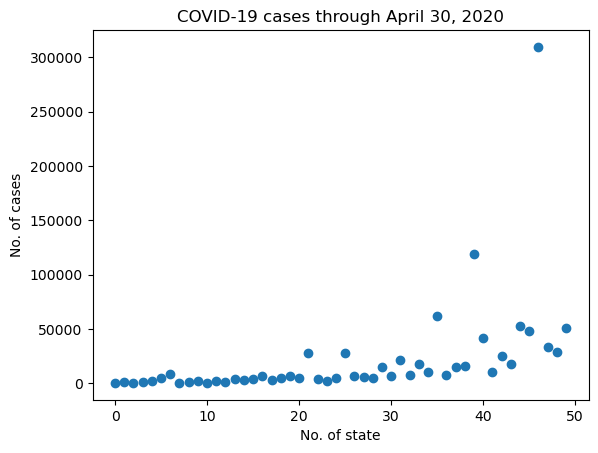

In [10]:
num_cases = len(cases)
plt.scatter(range(num_cases), cases)
plt.xlabel('No. of state')
plt.ylabel('No. of cases')
plt.title('COVID-19 cases through April 30, 2020')
plt.show()

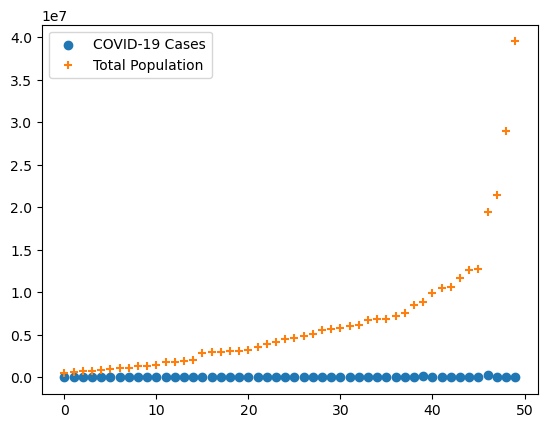

In [11]:
plt.scatter(range(num_cases), cases, label='COVID-19 Cases')
plt.scatter(range(num_cases), population, marker='+', label='Total Population')
plt.legend()
plt.show()

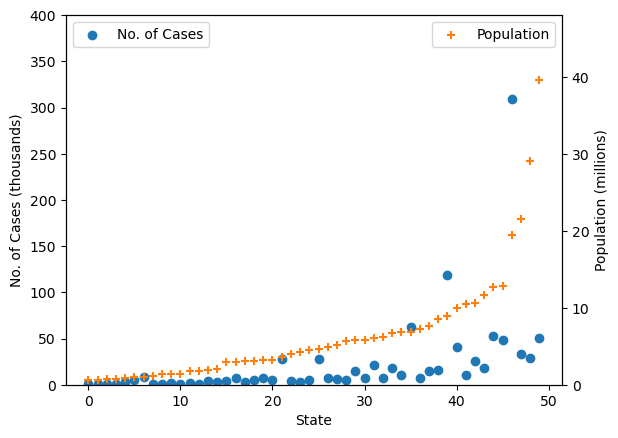

In [12]:
fig, ax = plt.subplots()
ax.scatter(range(num_cases), cases / 1000, label='No. of Cases')
ax.set_ylabel('No. of Cases (thousands)')
ax.set_xlabel('State')

ax2 = ax.twinx()
ax2.scatter(range(num_cases), population / 1e6, color='C1',marker='+', label='Population')
ax2.set_ylabel('Population (millions)')

ax.legend(loc=2)
ax2.legend()

ax.set_ylim(0, 4e2)
ax2.set_ylim(0, 48)
plt.show()

Para obentener nuevas variables podemos normalizar de acuerdo a valores per cápita:
* Casos per cápita
* Producto interno bruto per cápita

In [14]:
df['cases_pp'] = df['cases'] / df['population']
df['gdp_pp'] = df['gdp'] / df['population']
df.head()

,cases,population,gdp,urban,cases_pp,gdp_pp
state,,,,,,
Wyoming,559,578759,40764.3,64.76,0.000966,0.070434
Vermont,866,623989,34320.2,38.90,0.001388,0.055001
Alaska,353,731545,54674.7,66.02,0.000483,0.074739
North Dakota,1067,762062,57471.9,59.90,0.001400,0.075416
South Dakota,2450,884659,56051.9,56.65,0.002769,0.063360


In [15]:
cases_pp = df['cases_pp'].to_numpy()
gdp_pp = df['gdp_pp'].to_numpy()

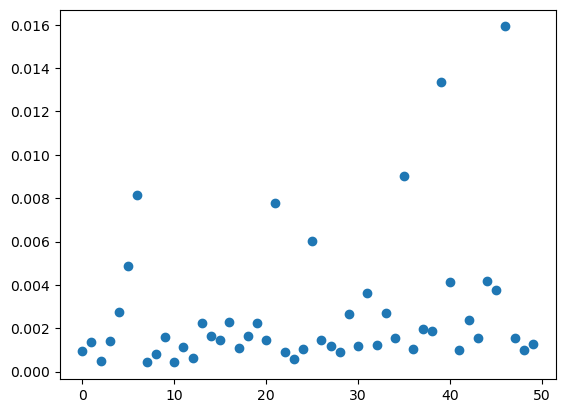

In [16]:
plt.scatter(range(num_cases), cases_pp)
plt.show()

In [17]:
df.sort_values('cases_pp', inplace=True, ascending=False)
df.head()

,cases,population,gdp,urban,cases_pp,gdp_pp
state,,,,,,
New York,309696,19453561,1791566.8,87.87,0.015920,0.092095
New Jersey,118652,8882190,642967.7,94.68,0.013358,0.072388
Massachusetts,62205,6892503,603209.6,91.97,0.009025,0.087517
Rhode Island,8621,1059361,62335.4,90.73,0.008138,0.058842
Connecticut,27700,3565287,290703.0,87.99,0.007769,0.081537


# Summary statistics

In [19]:
import numpy as np

In [20]:
#  The  data:
D  =  [-1,  -1,  0,  2,  5]
#  Sweep  the  value  of  nu  from  -2  to  6
nus  =  np.arange(-2,  6.01,  0.01)
#  For  clarity,  store  the  different  error  metrics  in  different  variables. #  Initialize  them  here
sum_errors  =  0
num_nonzero_errors  =  0
sum_abs_errors  =  0
sum_square_errors  =  0
#  Calculate  the  error  metrics
for  d  in  D:
    sum_errors  +=  d  -  nus
    num_nonzero_errors  +=  (d  -  nus)  !=  0 
    sum_abs_errors  +=  np.abs(d  -  nus) 
    sum_square_errors  +=  (d  -  nus)  **  2

Entendiendo a las estadísticas de resumen, como un error $e_i=d_i-v$, con $v$ una medida, podemos definir las funciones:
$$\begin{align*}
E_s(v)&=\sum_{o}^{N-1}{e_i}\\
E_0(v)&=\sum_{0}^{N-1}{{1}_{\mathbb{R}-\left\{0\right\}} (e_i) }\\
E_1(v)&=\sum_{0}^{N-1}{|e_i|}\\
E_2(v)&=\sum_{0}^{N-1}{(e_i)^2}
\end{align*}$$

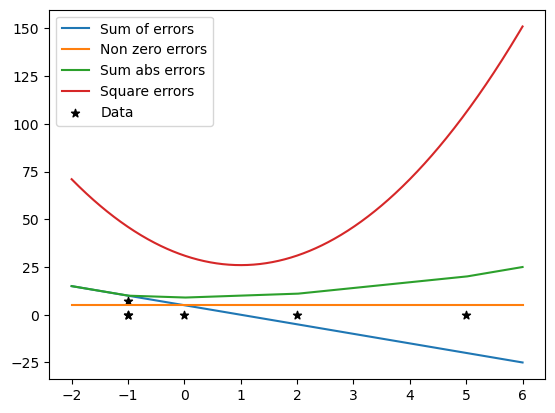

In [22]:
ymin, ymax = plt.ylim()

plt.plot(nus, sum_errors, label='Sum of errors')
plt.plot(nus, num_nonzero_errors, label='Non zero errors')
plt.plot(nus, sum_abs_errors, label='Sum abs errors')
plt.plot(nus, sum_square_errors, label='Square errors')
plt.scatter(D, ymin * np.ones(5), marker='*', color='k', label='Data')
plt.scatter(D[0], ymin + 7, marker='*', color='k')
plt.legend()
plt.show()

### Mode

La métrica non_zero define la moda.

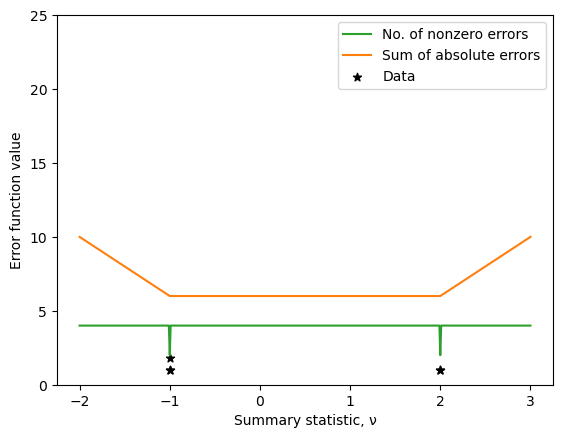

In [25]:
nus = np.arange(-2, 3.01, 0.01) 
D = [-1, -1, 2, 2]
# For clarity, store the different error metrics in different variables.
# Initialize them here
num_nonzero_errors = 0
sum_abs_errors = 0

# Calculate the error metrics
for d in D:
    num_nonzero_errors += np.round((d - nus),10) != 0
    sum_abs_errors += np.abs(d - nus)

plt.plot(nus, num_nonzero_errors, label="No. of nonzero errors", color= 'C2')
plt.plot(nus, sum_abs_errors, label="Sum of absolute errors", color='C1')

# Plot the data as markers
plt.ylim(0, 25)
ymin = 1
plt.scatter(D, ymin * np.ones(4), marker="*", label="Data", color="k")
# Plot the repeated value at -1 as a second marker:
plt.scatter(D[0], ymin + 0.8, marker="*", color="k")


plt.xlabel(r"Summary statistic, ν")
plt.ylabel("Error function value")
plt.legend();

In [26]:
df = pd.DataFrame(D)
df

,0
0,-1
1,-1
2,2
3,2


In [27]:
df.mode()

,0
0,-1
1,2


In [28]:
import scipy.stats as stats
stats.mode(D, keepdims=False)

ModeResult(mode=-1, count=2)

## Median

La mediana se obtiene con la función de valores absolutos, la cuál cambia de pendiente cuando los valores de $v$ y $d_i$ coinciden.

In [31]:
np.median(D)

0.5

In [32]:
df.median()

0    0.5
dtype: float64

## Mean

La media de se obtiene de la derivada de la función de suma de errores cuadrados.

In [35]:
np.mean(D)

0.5

In [36]:
df.mean()

0    0.5
dtype: float64

# Case study

## Partitions

In [39]:
df  =  pd.read_csv(  'https://www.fdsp.net/data/covid-merged.csv'  )
df.set_index('state', inplace=True)
df['cases_norm'] = df['cases'] / df['population'] * 1000

In [40]:
df.head()

,cases,population,gdp,urban,cases_norm
state,,,,,
Alabama,7068,4903185,230750.1,59.04,1.441512
Alaska,353,731545,54674.7,66.02,0.482540
Arizona,7648,7278717,379018.8,89.81,1.050735
Arkansas,3281,3017804,132596.4,56.16,1.087214
California,50470,39512223,3205000.1,94.95,1.277326


También normalizamos el producto interno bruto (DGP) en millones de dálares a miles de dólares por persona. 

In [42]:
df['gdp_norm'] = df['gdp'] / df['population'] * 1000
df.head()

,cases,population,gdp,urban,cases_norm,gdp_norm
state,,,,,,
Alabama,7068,4903185,230750.1,59.04,1.441512,47.061267
Alaska,353,731545,54674.7,66.02,0.482540,74.738670
Arizona,7648,7278717,379018.8,89.81,1.050735,52.072199
Arkansas,3281,3017804,132596.4,56.16,1.087214,43.938042
California,50470,39512223,3205000.1,94.95,1.277326,81.114143


## Partitioning using median

Dividimos el dataframe según la mediana de gdp_norm:

In [45]:
median_gdp_norm = df['gdp_norm'].median()
lower_gdp = df.query('gdp_norm > @median_gdp_norm')
lower_gdp.head()

,cases,population,gdp,urban,cases_norm,gdp_norm
state,,,,,,
Alaska,353,731545,54674.7,66.02,0.482540,74.738670
California,50470,39512223,3205000.1,94.95,1.277326,81.114143
Colorado,15207,5758736,400863.4,86.15,2.640684,69.609616
Connecticut,27700,3565287,290703.0,87.99,7.769361,81.537054
Delaware,4734,973764,77879.4,83.30,4.861548,79.977695


In [46]:
higher_gdp = df.query('gdp_norm <= @median_gdp_norm')
higher_gdp.head()

,cases,population,gdp,urban,cases_norm,gdp_norm
state,,,,,,
Alabama,7068,4903185,230750.1,59.04,1.441512,47.061267
Arizona,7648,7278717,379018.8,89.81,1.050735,52.072199
Arkansas,3281,3017804,132596.4,56.16,1.087214,43.938042
Florida,33683,21477737,1126510.3,91.16,1.568275,52.450139
Georgia,25431,10617423,634137.5,75.07,2.395214,59.726122


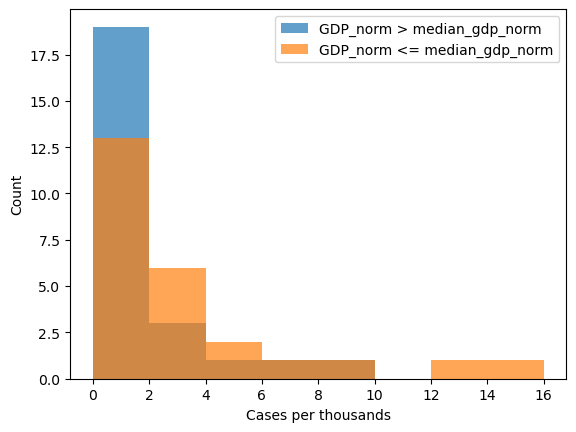

In [47]:
mybins = np.arange(0, 18, 2)
plt.hist(higher_gdp['cases_norm'], bins=mybins, label='GDP_norm > median_gdp_norm', alpha=0.7)
plt.hist(lower_gdp['cases_norm'], bins=mybins, label='GDP_norm <= median_gdp_norm', alpha=0.7)
plt.legend()
plt.xlabel('Cases per thousands')
plt.ylabel('Count')
plt.show()

In [48]:
hgdp = higher_gdp['cases_norm'].median()
lgdp = lower_gdp['cases_norm'].median()
hgdp, lgdp

(1.3878449780364717, 1.9453983135416348)

### Exercise: drop New York and New Jersey

Los valores de los estados de New York y New Jersey sesgan los valores del dataset. Los quitamos y analizamos de nuevo.

In [51]:
df2 = df.drop(['New York', 'New Jersey'])
df2.head()

,cases,population,gdp,urban,cases_norm,gdp_norm
state,,,,,,
Alabama,7068,4903185,230750.1,59.04,1.441512,47.061267
Alaska,353,731545,54674.7,66.02,0.482540,74.738670
Arizona,7648,7278717,379018.8,89.81,1.050735,52.072199
Arkansas,3281,3017804,132596.4,56.16,1.087214,43.938042
California,50470,39512223,3205000.1,94.95,1.277326,81.114143


In [52]:
median_gdp_norm = df2['gdp_norm'].median()
lower_gdp = df2.query('gdp_norm > @median_gdp_norm')
lower_gdp.head()

,cases,population,gdp,urban,cases_norm,gdp_norm
state,,,,,,
Alaska,353,731545,54674.7,66.02,0.482540,74.738670
California,50470,39512223,3205000.1,94.95,1.277326,81.114143
Colorado,15207,5758736,400863.4,86.15,2.640684,69.609616
Connecticut,27700,3565287,290703.0,87.99,7.769361,81.537054
Delaware,4734,973764,77879.4,83.30,4.861548,79.977695


In [53]:
higher_gdp = df2.query('gdp_norm <= @median_gdp_norm')
higher_gdp.head()

,cases,population,gdp,urban,cases_norm,gdp_norm
state,,,,,,
Alabama,7068,4903185,230750.1,59.04,1.441512,47.061267
Arizona,7648,7278717,379018.8,89.81,1.050735,52.072199
Arkansas,3281,3017804,132596.4,56.16,1.087214,43.938042
Florida,33683,21477737,1126510.3,91.16,1.568275,52.450139
Georgia,25431,10617423,634137.5,75.07,2.395214,59.726122


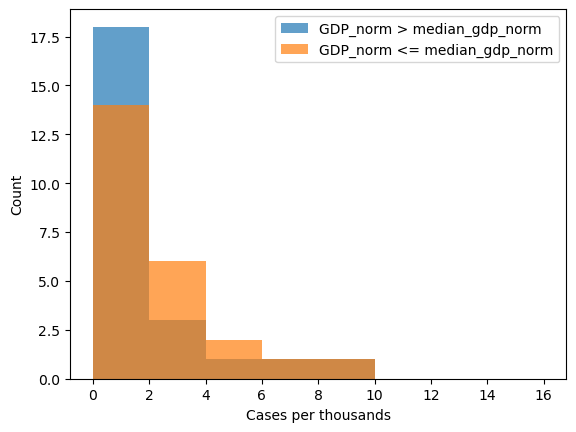

In [54]:
plt.hist(higher_gdp['cases_norm'], bins=mybins, label='GDP_norm > median_gdp_norm', alpha=0.7)
plt.hist(lower_gdp['cases_norm'], bins=mybins, label='GDP_norm <= median_gdp_norm', alpha=0.7)
plt.legend()
plt.xlabel('Cases per thousands')
plt.ylabel('Count')
plt.show()

In [55]:
higher_gdp['cases_norm'].mean(), lower_gdp['cases_norm'].mean()

(1.956147811504551, 2.4875197474167936)

## Exercises

### Exercise: partitioning using the mean

Partition the data around the mean GDP. Plot the histograms and find the averages for this new grouping.

In [59]:
mean_gdp_norm = df2['gdp_norm'].mean()
lower_gdp = df2.query('gdp_norm > @mean_gdp_norm')
lower_gdp.head()

,cases,population,gdp,urban,cases_norm,gdp_norm
state,,,,,,
Alaska,353,731545,54674.7,66.02,0.482540,74.738670
California,50470,39512223,3205000.1,94.95,1.277326,81.114143
Colorado,15207,5758736,400863.4,86.15,2.640684,69.609616
Connecticut,27700,3565287,290703.0,87.99,7.769361,81.537054
Delaware,4734,973764,77879.4,83.30,4.861548,79.977695


In [60]:
higher_gdp = df2.query('gdp_norm <= @mean_gdp_norm')
higher_gdp.head()

,cases,population,gdp,urban,cases_norm,gdp_norm
state,,,,,,
Alabama,7068,4903185,230750.1,59.04,1.441512,47.061267
Arizona,7648,7278717,379018.8,89.81,1.050735,52.072199
Arkansas,3281,3017804,132596.4,56.16,1.087214,43.938042
Florida,33683,21477737,1126510.3,91.16,1.568275,52.450139
Georgia,25431,10617423,634137.5,75.07,2.395214,59.726122


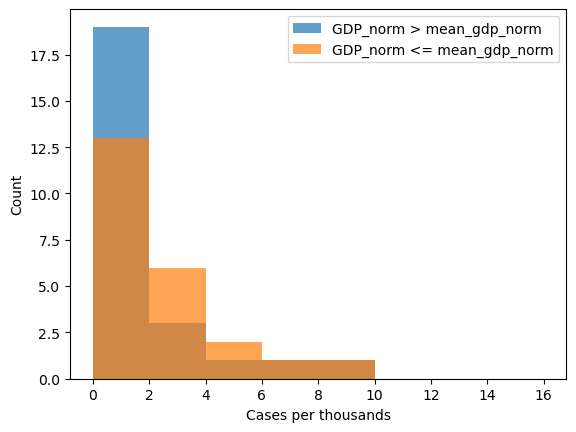

In [61]:
plt.hist(higher_gdp['cases_norm'], bins=mybins, label='GDP_norm > mean_gdp_norm', alpha=0.7)
plt.hist(lower_gdp['cases_norm'], bins=mybins, label='GDP_norm <= mean_gdp_norm', alpha=0.7)
plt.legend()
plt.xlabel('Cases per thousands')
plt.ylabel('Count')
plt.show()

In [62]:
mean_gdp_norm, median_gdp_norm

(61.17427192500435, 60.4806480103203)

### Partitioning based on urban index

In [64]:
median_urban = df['urban'].median()
median_urban

73.735

In [65]:
higher_urban = df.query('urban > @median_urban')
higher_urban.head()

,cases,population,gdp,urban,cases_norm,gdp_norm
state,,,,,,
Arizona,7648,7278717,379018.8,89.81,1.050735,52.072199
California,50470,39512223,3205000.1,94.95,1.277326,81.114143
Colorado,15207,5758736,400863.4,86.15,2.640684,69.609616
Connecticut,27700,3565287,290703.0,87.99,7.769361,81.537054
Delaware,4734,973764,77879.4,83.30,4.861548,79.977695


In [66]:
lower_urban = df.query('urban <= @median_urban')
lower_urban.head()

,cases,population,gdp,urban,cases_norm,gdp_norm
state,,,,,,
Alabama,7068,4903185,230750.1,59.04,1.441512,47.061267
Alaska,353,731545,54674.7,66.02,0.482540,74.738670
Arkansas,3281,3017804,132596.4,56.16,1.087214,43.938042
Idaho,2016,1787065,85791.1,70.58,1.128107,48.006704
Indiana,18099,6732219,384871.7,72.44,2.688415,57.168624


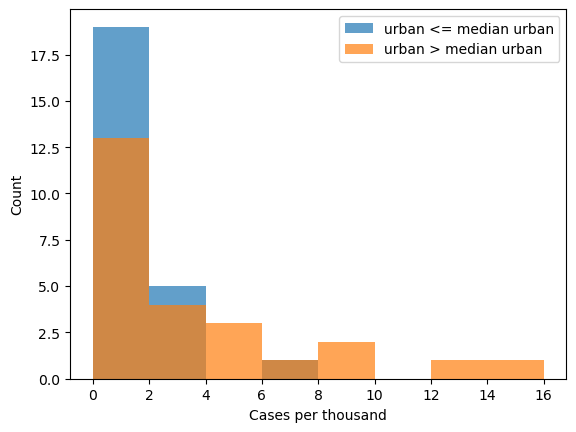

In [67]:
plt.hist(lower_urban['cases_norm'], alpha=0.7, label='urban <= median urban', bins=mybins)
plt.hist(higher_urban['cases_norm'], alpha=0.7, label='urban > median urban', bins=mybins)
plt.legend()
plt.xlabel('Cases per thousand')
plt.ylabel('Count')
plt.show()

In [68]:
higher_urban['cases_norm'].mean(), lower_urban['cases_norm'].mean()

(3.8908749904320756, 1.5461729098384682)

In [69]:
higher_urban['cases_norm'].median(), lower_urban['cases_norm'].median()

(1.9453983135416348, 1.1976091098671104)

Dropping New York and New Jersey:

In [71]:
df2 = df.drop(['New York', 'New Jersey'])
df2.head()

,cases,population,gdp,urban,cases_norm,gdp_norm
state,,,,,,
Alabama,7068,4903185,230750.1,59.04,1.441512,47.061267
Alaska,353,731545,54674.7,66.02,0.482540,74.738670
Arizona,7648,7278717,379018.8,89.81,1.050735,52.072199
Arkansas,3281,3017804,132596.4,56.16,1.087214,43.938042
California,50470,39512223,3205000.1,94.95,1.277326,81.114143


In [72]:
median_urban = df2['urban'].median()
median_urban

73.22999999999999

In [73]:
higher_urban = df2.query('urban > @median_urban')
higher_urban.head()

,cases,population,gdp,urban,cases_norm,gdp_norm
state,,,,,,
Arizona,7648,7278717,379018.8,89.81,1.050735,52.072199
California,50470,39512223,3205000.1,94.95,1.277326,81.114143
Colorado,15207,5758736,400863.4,86.15,2.640684,69.609616
Connecticut,27700,3565287,290703.0,87.99,7.769361,81.537054
Delaware,4734,973764,77879.4,83.30,4.861548,79.977695


In [74]:
lower_urban = df2.query('urban <= @median_urban')
lower_urban.head()

,cases,population,gdp,urban,cases_norm,gdp_norm
state,,,,,,
Alabama,7068,4903185,230750.1,59.04,1.441512,47.061267
Alaska,353,731545,54674.7,66.02,0.482540,74.738670
Arkansas,3281,3017804,132596.4,56.16,1.087214,43.938042
Idaho,2016,1787065,85791.1,70.58,1.128107,48.006704
Indiana,18099,6732219,384871.7,72.44,2.688415,57.168624


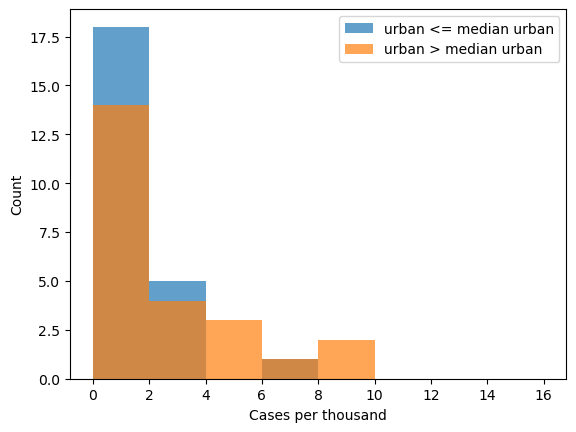

In [75]:
plt.hist(lower_urban['cases_norm'], alpha=0.7, label='urban <= median urban', bins=mybins)
plt.hist(higher_urban['cases_norm'], alpha=0.7, label='urban > median urban', bins=mybins)
plt.legend()
plt.xlabel('Cases per thousand')
plt.ylabel('Count')
plt.show()

In [76]:
higher_urban['cases_norm'].mean(), lower_urban['cases_norm'].mean()

(2.8710165161430985, 1.5726510427782454)

In [77]:
higher_urban['cases_norm'].median(), lower_urban['cases_norm'].median()

(1.7486066302038, 1.214942129174752)

## Null hypothesis

In [79]:
df  =  pd.read_csv(  'https://www.fdsp.net/data/covid-merged.csv'  )
df.set_index('state', inplace=True)
df['cases_norm'] = df['cases'] / df['population'] * 1000
df['gdp_norm'] = df['gdp'] / df['population'] * 1000

In [80]:
first3 = df.loc[:'Arizona']
first3.head()

,cases,population,gdp,urban,cases_norm,gdp_norm
state,,,,,,
Alabama,7068,4903185,230750.1,59.04,1.441512,47.061267
Alaska,353,731545,54674.7,66.02,0.482540,74.738670
Arizona,7648,7278717,379018.8,89.81,1.050735,52.072199


In [81]:
second3 = df.loc['Arkansas':'Colorado']
second3

,cases,population,gdp,urban,cases_norm,gdp_norm
state,,,,,,
Arkansas,3281,3017804,132596.4,56.16,1.087214,43.938042
California,50470,39512223,3205000.1,94.95,1.277326,81.114143
Colorado,15207,5758736,400863.4,86.15,2.640684,69.609616


In [82]:
first3.cases_norm.mean(), second3.cases_norm.mean()

(0.9915956672540028, 1.6684081069437913)

In [83]:
second3.cases_norm.mean() - first3.cases_norm.mean()

0.6768124396897884

## Null Hipothesys Significance Test throguh Resampling

In [85]:
np.random.seed(21341)

In [86]:
pooled = np.hstack((first3['cases_norm'], second3['cases_norm']))

In [87]:
first3_sample = np.random.choice(pooled, len(first3))
second3_sample = np.random.choice(pooled, len(second3))
print(f'first3_sample: {first3_sample}')
print(f'second3_sample: {second3_sample}')

print(f'Original test value: {second3.cases_norm.mean()-first3.cases_norm.mean()}')
print(f'Resampling value:',
     f'{first3_sample.mean()-second3_sample.mean()}')

first3_sample: [1.05073463 1.05073463 2.64068365]
second3_sample: [2.64068365 1.27732626 1.08721441]
Original test value: 0.6768124396897884
Resampling value: -0.08769047153973597


In [88]:
num_sims = 10_000
count = 0
first3_len = len(first3)
second3_len = len(second3)
diff  = second3.cases_norm.mean() - first3.cases_norm.mean()

alldifferences = []

for i in range(num_sims):
    first3_sample = np.random.choice(pooled, first3_len)
    second3_sample = np.random.choice(pooled, second3_len)
    newdiff = abs( second3_sample.mean() - first3_sample.mean() )
    alldifferences.append(newdiff)
    if newdiff >= diff:
        count +=1
print(f'p-value: {count / num_sims}')

p-value: 0.2072


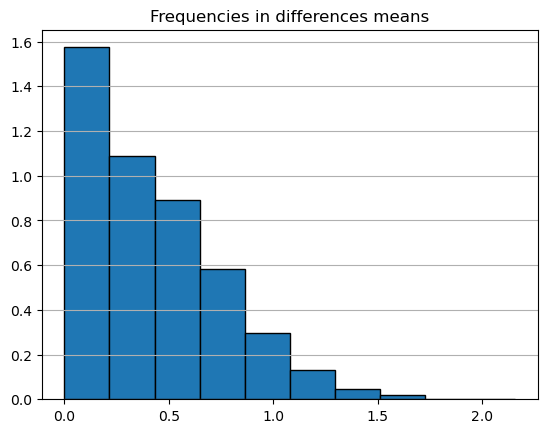

In [89]:
plt.hist(alldifferences, density=True, edgecolor='black')
plt.grid(axis='y')
plt.title('Frequencies in differences means')
plt.show()

## Testing with the full dataset

In [91]:
# Find median gdp_norm
median_gdp = df['gdp_norm'].median()
# Filtering partition
higher_gdp = df[df['gdp_norm'] > median_gdp]
lower_gdp = df[df['gdp_norm'] <= median_gdp]
# Calculate mean of cases_norm in partition
mean_higher_gdp = higher_gdp['cases_norm'].mean()
mean_lower_gdp = lower_gdp['cases_norm'].mean()
# Calculate difference
diff_gdp = mean_higher_gdp - mean_lower_gdp

In [92]:
num_sims = 10_000

higher_gdp_len = len(higher_gdp)
lower_gdp_len = len(lower_gdp)

pooled_covid = df['cases_norm']

count = 0
for sim in range(num_sims):
    higher_gdp_sample = np.random.choice(pooled_covid, higher_gdp_len)
    lower_gdp_sample = np.random.choice(pooled_covid, lower_gdp_len)
    
    new_diff = abs( higher_gdp_sample.mean() - lower_gdp_sample.mean() )
    if new_diff >= diff_gdp:
        count += 1

print(f'Probability of seeing a value under statistic test H_0: {count / num_sims}')

Probability of seeing a value under statistic test H_0: 0.0751


In [93]:
def resample_mean(pooled_data, diff, len1, len2, num_sims=10_000):
    '''
    Resample  from  pooled  data  and  conduct  a  two-tailed  NHST 
    on  the  mean-difference
    Inputs
    ------
    pooled_data:  NumPy  array  of  all  data  in  the  original  2  
    groups diff:  observed  difference  in  sample  means  in  the original  groups 
    len1,  len2:  the  lengths  of  the  original  groups 
    num_sims:  the  number  of  simulation  iterations
    
    Output 
    ------
    prints resulting  p-value
    '''
    count = 0
    
    for sim in range(num_sims):
        group1 = np.random.choice(pooled_data, len1)
        group2 = np.random.choice(pooled_data, len2)
        
        new_diff = abs( group1.mean() - group2.mean() )
        
        if new_diff >= diff:
            count += 1
            
    print(f'p-value of seeing a statistic test value by randomness: {count / num_sims}')

In [94]:
resample_mean(pooled_covid, diff_gdp, len1=higher_gdp_len, len2=lower_gdp_len)

p-value of seeing a statistic test value by randomness: 0.0735


Al hacer el test tomando en cuenta un statistic-test de la urbanización:

In [96]:
# Calculate median
median_urban = df['urban'].median()
# Filtering
higher_urban = df[df['urban'] > median_urban]
len_higher_urban = len(higher_urban)

lower_urban = df[df['urban'] <= median_urban]
len_lower_urban = len(lower_urban)
# Calculate mean in partitions
mean_higher_urban = higher_urban['cases_norm'].mean()
mean_lower_urban = lower_urban['cases_norm'].mean()
# Difference
diff_urban = mean_higher_urban - mean_lower_urban

In [97]:
mean_higher_urban, mean_lower_urban

(3.8908749904320756, 1.5461729098384682)

In [98]:
diff_urban

2.344702080593607

In [99]:
resample_mean(pooled_covid, diff_urban, len1=len_higher_urban, len2=len_lower_urban)

p-value of seeing a statistic test value by randomness: 0.0079


## Distribution

In [101]:
def resample_mean_hist(pooled_data, diff, len1, len2, num_sims=10_000):
    '''
    Resample  from  pooled  data  and  conduct  a  two-tailed  NHST 
    on  the  mean-difference
    Inputs
    ------
    pooled_data:  NumPy  array  of  all  data  in  the  original  2  
    groups diff:  observed  difference  in  sample  means  in  the original  groups 
    len1,  len2:  the  lengths  of  the  original  groups 
    num_sims:  the  number  of  simulation  iterations
    
    Output 
    ------
    prints resulting  p-value
    '''
    count = 0
    sample_means = []
    
    for sim in range(num_sims):
        group1 = np.random.choice(pooled_data, len1)
        group2 = np.random.choice(pooled_data, len2)
        
        new_diff = abs( group1.mean() - group2.mean() )

        sample_means.append( group1.mean() - group2.mean() )
        
        if new_diff >= diff:
            count += 1
            
    print(f'p-value of seeing a statistic test value by randomness: {count / num_sims}')
    plt.hist(sample_means, bins=40, edgecolor='black')
    plt.show()

p-value of seeing a statistic test value by randomness: 0.0089


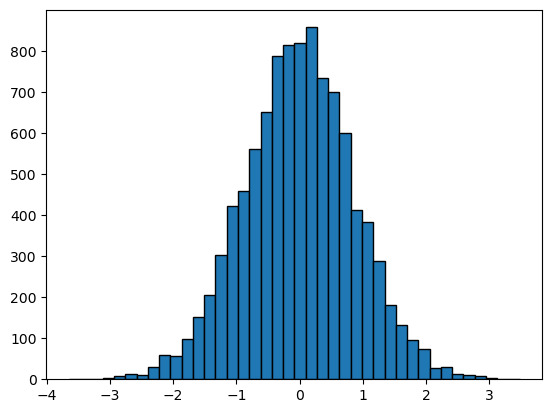

In [102]:
resample_mean_hist(pooled_covid, diff_urban, len1=len_higher_urban, len2=len_lower_urban)

## Two dimensional methods

In [180]:
from scipy.stats import linregress

In [182]:
regression_covid_urban = linregress(df['urban'], df['cases_norm'])
regression_covid_urban

LinregressResult(slope=0.0917027723921469, intercept=-4.029131107469203, rvalue=0.42451161644162405, pvalue=0.002122156503677001, stderr=0.02823082347614785, intercept_stderr=2.116778144832277)

In [184]:
x = df['urban']
y_regression_values = regression_covid_urban.slope * x + regression_covid_urban.intercept

In [202]:
y_real_values = df['cases_norm']
np.sum( (y_real_values - y_regression_values)**2 )

397.62981896613957

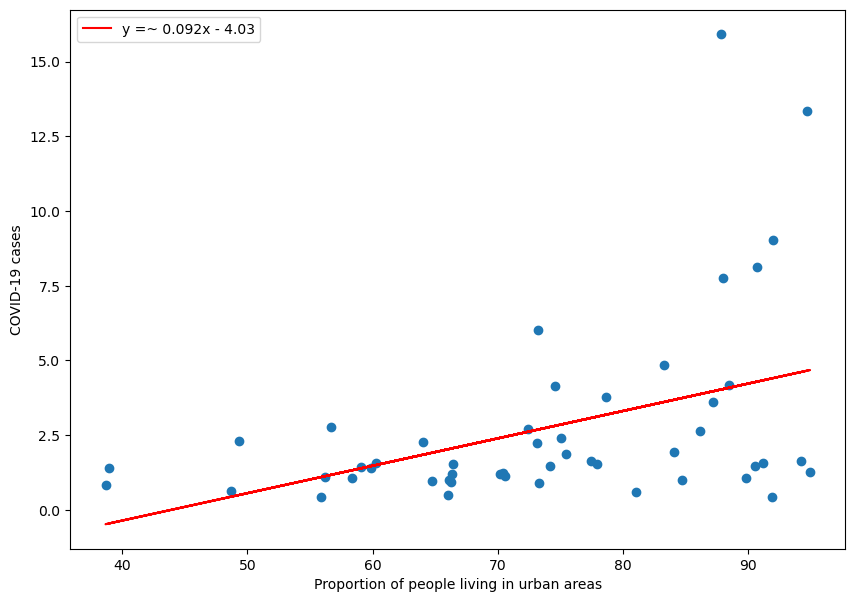

In [204]:
plt.figure(figsize=(10,7))
plt.scatter(df['urban'], df['cases_norm'])
plt.plot(x, y_regression_values, label='y =~ 0.092x - 4.03', color = 'red')
plt.xlabel('Proportion of people living in urban areas')
plt.ylabel('COVID-19 cases')
plt.legend()
plt.show()